In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [3]:
ls

 1.json      cloudTut4.ipynb                    s1.json         tut1cloud.ipynb
 1.txt      'Copy of StudentDataEditor.ipynb'   students.json   tut2.ipynb
 apod.json   data.json                          students.txt    Untitled


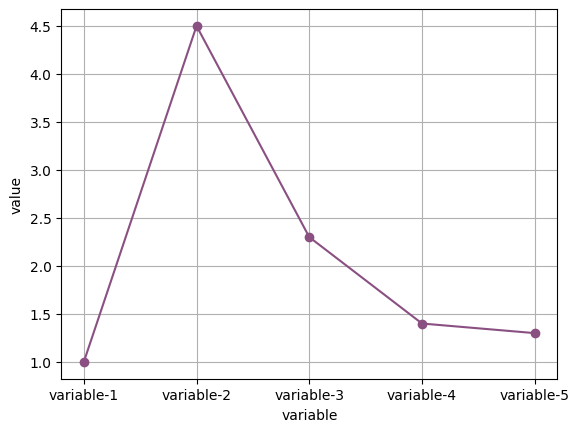

In [ ]:
import matplotlib.pyplot as plt
import json

dictionary = json.load(open('1.json', 'r'))
xAxis = [key for key, value in dictionary.items()]
yAxis = [value for key, value in dictionary.items()]
plt.grid(True)
## LINE GRAPH ##
plt.plot(xAxis,yAxis, color='#8a5082', marker='o')
plt.xlabel("variable")
plt.ylabel("value")

plt.show()


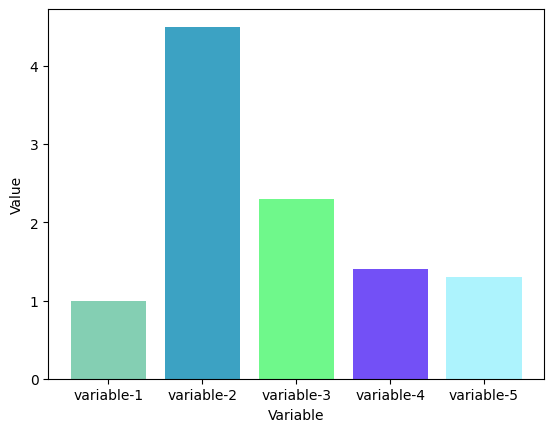

In [ ]:
import matplotlib.pyplot as plt
import json

# Load data from JSON file
dictionary = json.load(open('1.json', 'r'))

# Extract keys and values for plotting
xAxis = [key for key, value in dictionary.items()]
yAxis = [value for key, value in dictionary.items()]

# List of colors for each bar
colors = ['#84CFB3', '#3CA2C3', '#6FF88B', '#7350F6', '#ADF3FD']

# Create a bar chart
fig = plt.figure()
plt.bar(xAxis, yAxis, color=colors)
plt.xlabel("Variable")
plt.ylabel("Value")
plt.show()


In [ ]:
import pandas as pd
a = [1, 7, 2]
myvar = pd.Series(a)
print(myvar)
print(myvar[0])


0    1
1    7
2    2
dtype: int64
1


In [ ]:
import pandas as pd

calories = {"day1": 420, "day2": 380, "day3": 390}

myvar = pd.Series(calories)

print(myvar)


day1    420
day2    380
day3    390
dtype: int64


In [ ]:
import pandas as pd

data = {
    "calories": [420, 380, 390],
    "duration": [50, 40, 45]
}

myvar2 = pd.DataFrame(data, index=["day1", "day2", "day3"])

print(myvar2)


      calories  duration
day1       420        50
day2       380        40
day3       390        45


In [ ]:
import pandas as pd

data = {
    "calories": [420, 380, 390],
    "duration": [50, 40, 45]
}

df = pd.DataFrame(data, index=["day1", "day2", "day3"])

print(df)
print("----------------------")

# Refer to the named index:
print(df.loc["day2"])


      calories  duration
day1       420        50
day2       380        40
day3       390        45
----------------------
calories    380
duration     40
Name: day2, dtype: int64


In [ ]:
import pandas

mydataset = {
    'cars': ["BMW", "Volvo", "Ford"],
    'passings': [3, 7, 2]
}

myvar = pandas.DataFrame(mydataset)

print(myvar)


    cars  passings
0    BMW         3
1  Volvo         7
2   Ford         2


In [ ]:
import pandas as pd

data = {
    "Duration": {
        "0": 60,
        "1": 60,
        "2": 60,
        "3": 45,
        "4": 45,
        "5": 60
    },
    "Pulse": {
        "0": 110,
        "1": 117,
        "2": 103,
        "3": 109,
        "4": 117,
        "5": 102
    },
    "Maxpulse": {
        "0": 130,
        "1": 145,
        "2": 135,
        "3": 175,
        "4": 148,
        "5": 127
    },
    "Calories": {
        "0": 409.1,
        "1": 479.0,
        "2": 340.0,
        "3": 282.4,
        "4": 406.0,
        "5": 300.5
    }
}

df = pd.DataFrame(data)

print(df)



   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0
5        60    102       127     300.5


In [ ]:
import pandas as pd
import json

# JSON data as a string
json_data = """
{
    "Duration": {"0": 60, "1": 60, "2": 60, "3": 45, "4": 45, "5": 60},
    "Pulse": {"0": 110, "1": 117, "2": 103, "3": 109, "4": 117, "5": 102},
    "Maxpulse": {"0": 130, "1": 145, "2": 135, "3": 175, "4": 148, "5": 127},
    "Calories": {"0": 409.1, "1": 479.0, "2": 340.0, "3": 282.4, "4": 406.0, "5": 300.5}
}
"""

# Convert JSON string to DataFrame
df = pd.read_json(json_data)

# Print the DataFrame
print(df.to_string())


   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0
5        60    102       127     300.5


In [26]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the data from a JSON file
df = pd.read_json('data.json')

# Convert the 'Time' column to datetime and extract unique attributes
df['Time'] = pd.to_datetime(df['Time'])
unique_dates = df['Time'].dt.date.unique()
unique_documents = df['Document'].unique()
unique_tabs = df['Tab'].unique()
unique_users = df['User'].unique()

# Create dropdown widgets for 'Date', 'Document', 'Tab', and 'User'
date_dropdown = widgets.Dropdown(options=[None] + list(unique_dates), description='Date:', disabled=False)
document_dropdown = widgets.Dropdown(options=[None] + list(unique_documents), description='Document:', disabled=False)
tab_dropdown = widgets.Dropdown(options=[None] + list(unique_tabs), description='Tab:', disabled=False)
user_dropdown = widgets.Dropdown(options=[None] + list(unique_users), description='User:', disabled=False)

# Create checkboxes for each dropdown
date_checkbox = widgets.Checkbox(value=False, description='Include Date')
document_checkbox = widgets.Checkbox(value=False, description='Include Document')
tab_checkbox = widgets.Checkbox(value=False, description='Include Tab')
user_checkbox = widgets.Checkbox(value=False, description='Include User')

def filter_dataframe(*args):
    conditions = pd.Series([True] * len(df))

    if date_checkbox.value and date_dropdown.value:
        conditions &= (df['Time'].dt.date == date_dropdown.value)
    if document_checkbox.value and document_dropdown.value:
        conditions &= (df['Document'] == document_dropdown.value)
    if tab_checkbox.value and tab_dropdown.value:
        conditions &= (df['Tab'] == tab_dropdown.value)
    if user_checkbox.value and user_dropdown.value:
        conditions &= (df['User'] == user_dropdown.value)

    filtered_df = df[conditions]

    with output:
        clear_output(wait=True)
        display(filtered_df)


output = widgets.Output()

date_dropdown.observe(filter_dataframe, names='value')
document_dropdown.observe(filter_dataframe, names='value')
tab_dropdown.observe(filter_dataframe, names='value')
user_dropdown.observe(filter_dataframe, names='value')
date_checkbox.observe(filter_dataframe, names='value')
document_checkbox.observe(filter_dataframe, names='value')
tab_checkbox.observe(filter_dataframe, names='value')
user_checkbox.observe(filter_dataframe, names='value')


vbox = widgets.VBox([
    widgets.HBox([date_dropdown, date_checkbox]),
    widgets.HBox([document_dropdown, document_checkbox]),
    widgets.HBox([tab_dropdown, tab_checkbox]),
    widgets.HBox([user_dropdown, user_checkbox]),
    output
])
display(vbox)
